In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor, MLPClassifier
import matplotlib.pyplot as plt

In [10]:
#summary statistics of data
data = pd.read_excel("Data.xlsx", skiprows=1)
print(data.describe())

       Stirringspeed          Temp          Time        Dosage            pH  \
count   98112.000000  98112.000000  98112.000000  98112.000000  98112.000000   
mean       62.500000     31.250000     49.791667      0.022500      5.958333   
std         8.779756      3.608458     17.881597      0.007217      1.567362   
min        60.000000     30.000000      5.000000      0.020000      2.000000   
25%        60.000000     30.000000     47.500000      0.020000      6.000000   
50%        60.000000     30.000000     60.000000      0.020000      6.000000   
75%        60.000000     30.000000     60.000000      0.020000      6.000000   
max       100.000000     45.000000     60.000000      0.050000     10.000000   

       Concentration  Concentration,Cf(mg/L)  Adsorption capacity(mg/g)  \
count   98112.000000            98112.000000               98112.000000   
mean      481.250000              187.091458                 686.191111   
std       331.605275              181.816930          

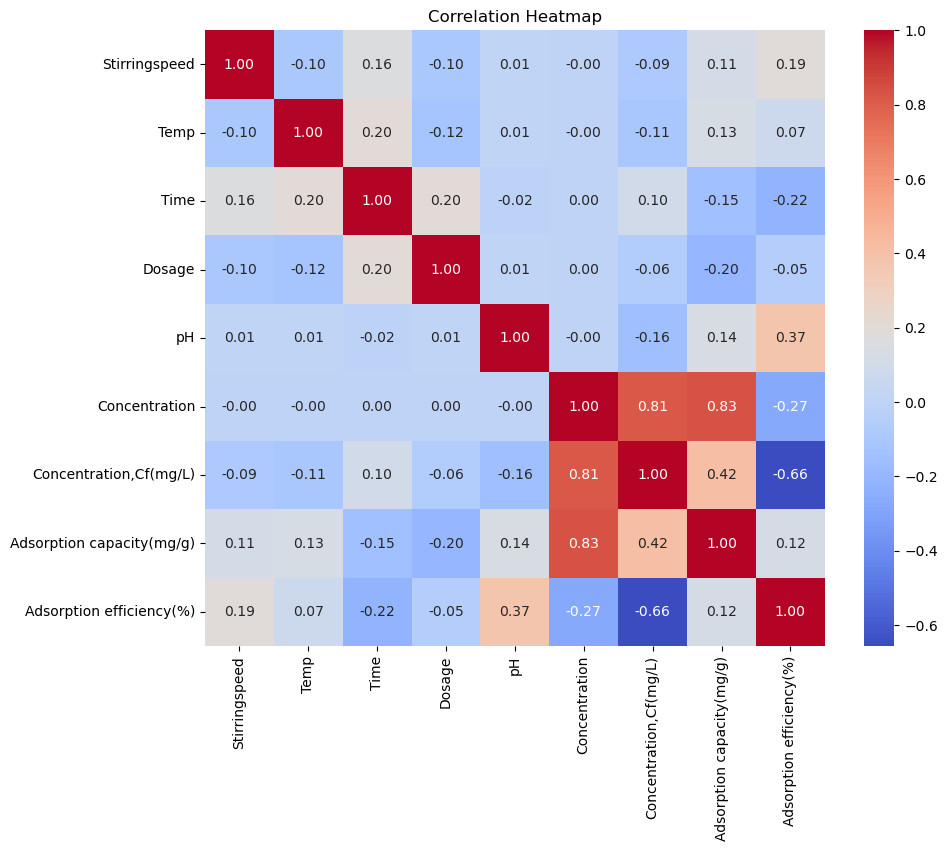

In [11]:
#correlation matrix heat map
data = pd.read_excel("Data.xlsx", skiprows=1)
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

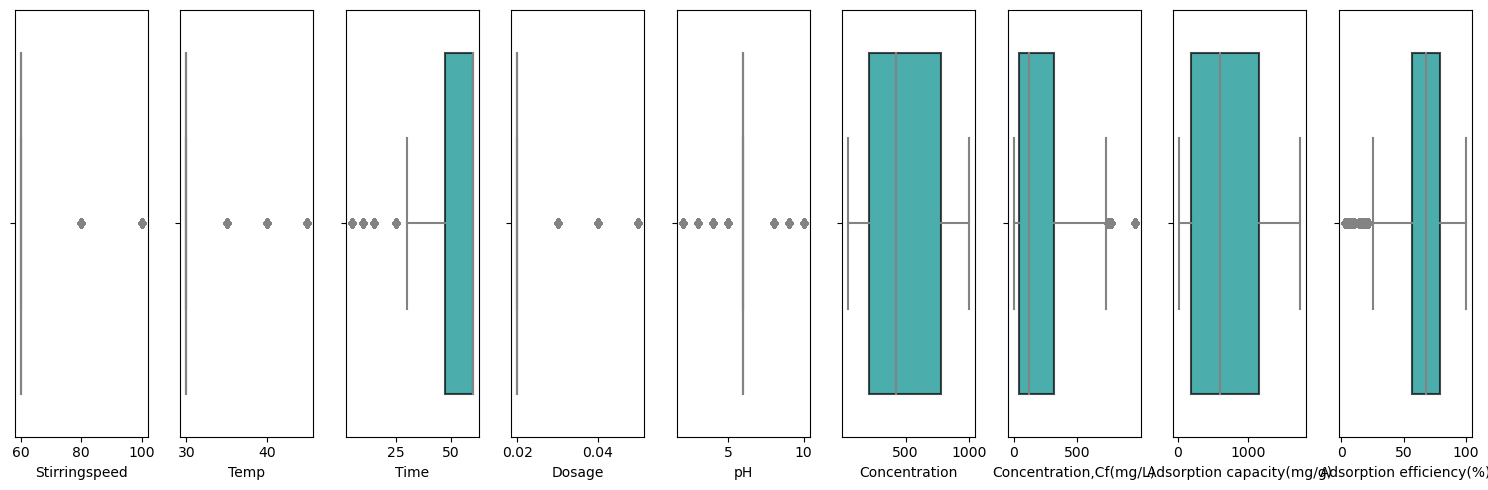

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel("Data.xlsx", skiprows=1)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=data.shape[1], figsize=(15, 5))

# Plot box plots with light pink fill color
for i, col in enumerate(data.columns):
    sns.boxplot(x=data[col], ax=axes[i], orient="h", color='lightpink', boxprops=dict(facecolor='darkcyan', edgecolor='black', alpha=0.7))

# Set titles and labels
for i, col in enumerate(data.columns):
      axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor, MLPClassifier
import matplotlib.pyplot as plt
data = pd.read_excel("Data.xlsx", skiprows=1)
X = data.drop(columns=['Stirringspeed', 'Temp', 'Time', 'Dosage', 'pH', 'Concentration'], axis =1)
y = data[['Concentration,Cf(mg/L)', 'Adsorption capacity(mg/g)', 'Adsorption efficiency(%)']]
X.columns = X.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
model = MLPRegressor(hidden_layer_sizes=(20, 20), activation='relu', solver='adam', max_iter=200, tol=1e-4, validation_fraction=0.15)
model.fit(X_train, y_train)
y_train = model.predict(X_train)
y_pred = model.predict(X_test)

#Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2:", r2_score(y_test, y_pred, sample_weight=None, force_finite=True))

Mean Squared Error: 0.014239775612366112
R2: 0.9999890284741987


In [8]:
num_data_points_to_print = min(200, len(y_test))  # upto 200 data points 

output_df = pd.DataFrame({'Actual_Concentration,Cf(mg/L)': y_test.iloc[:num_data_points_to_print, 0].values,
                          'Predicted_Concentration,Cf(mg/L)': y_pred[:num_data_points_to_print, 0],
                          'Actual_Adsorption capacity(mg/g)': y_test.iloc[:num_data_points_to_print, 1].values,
                          'Predicted_Adsorption capacity(mg/g)': y_pred[:num_data_points_to_print, 1],
                          'Actual_Adsorption efficiency(%)': y_test.iloc[:num_data_points_to_print, 2].values,
                          'Predicted_Adsorption efficiency(%)': y_pred[:num_data_points_to_print, 2]})
output_df

,"Actual_Concentration,Cf(mg/L)","Predicted_Concentration,Cf(mg/L)",Actual_Adsorption capacity(mg/g),Predicted_Adsorption capacity(mg/g),Actual_Adsorption efficiency(%),Predicted_Adsorption efficiency(%)
0,469.68,469.632143,700.8,700.731004,37.376000,37.501769
1,1.00,1.060019,122.5,122.628303,98.000000,98.028314
2,340.08,340.087470,24.8,24.946430,2.834286,3.109184
3,68.88,69.116184,77.8,77.826862,31.120000,31.201873
4,737.68,737.956691,655.8,655.616312,26.232000,26.307504
...,...,...,...,...,...,...
195,119.68,119.765285,325.8,325.777065,52.128000,52.193525
196,15.96,15.870688,585.1,585.019968,93.616000,93.626514
197,4.48,4.334003,113.8,113.714089,91.040000,91.148058
198,39.20,39.292668,152.0,151.981386,60.800000,60.839209


ANN model prediction


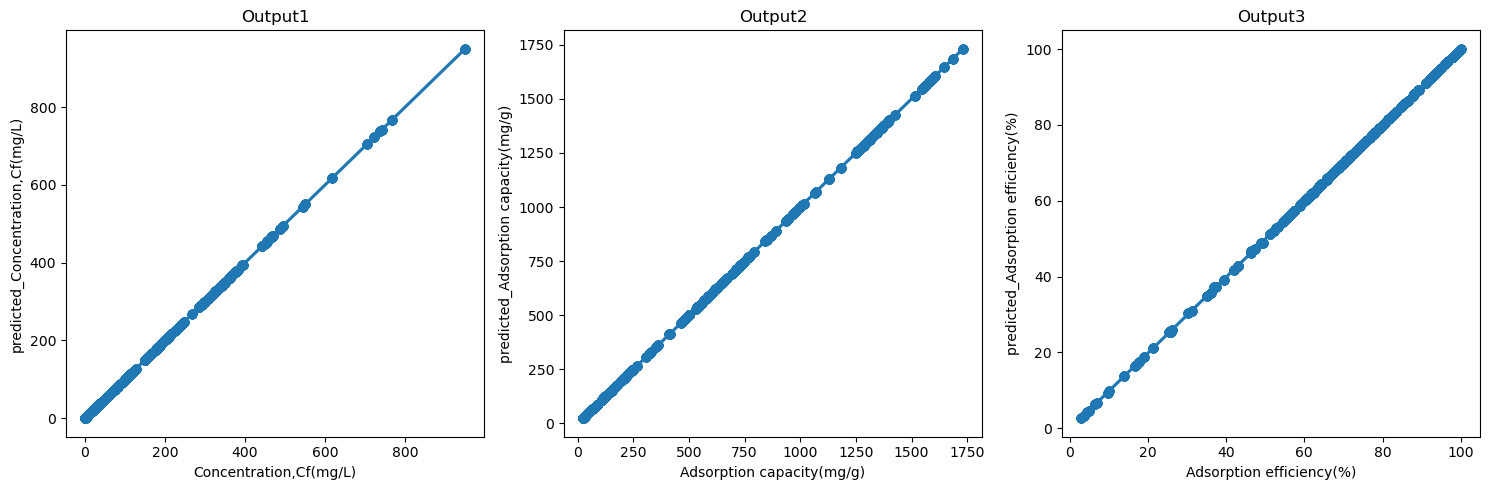

In [32]:
import seaborn as sns
df = pd.read_excel("predicted_data_with_inputs.xlsx")

# Create subplots in one line
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns for 3 plots


sns.regplot(x='Concentration,Cf(mg/L)', y='predicted_Concentration,Cf(mg/L)', data=df, ax=axes[0])
axes[0].set_title('Output1')

sns.regplot(x='Adsorption capacity(mg/g)', y='predicted_Adsorption capacity(mg/g)', data=df, ax=axes[1])
axes[1].set_title('Output2')

sns.regplot(x='Adsorption efficiency(%)', y='predicted_Adsorption efficiency(%)', data=df, ax=axes[2])
axes[2].set_title('Output3')

print('ANN model prediction')
plt.tight_layout()

plt.show()

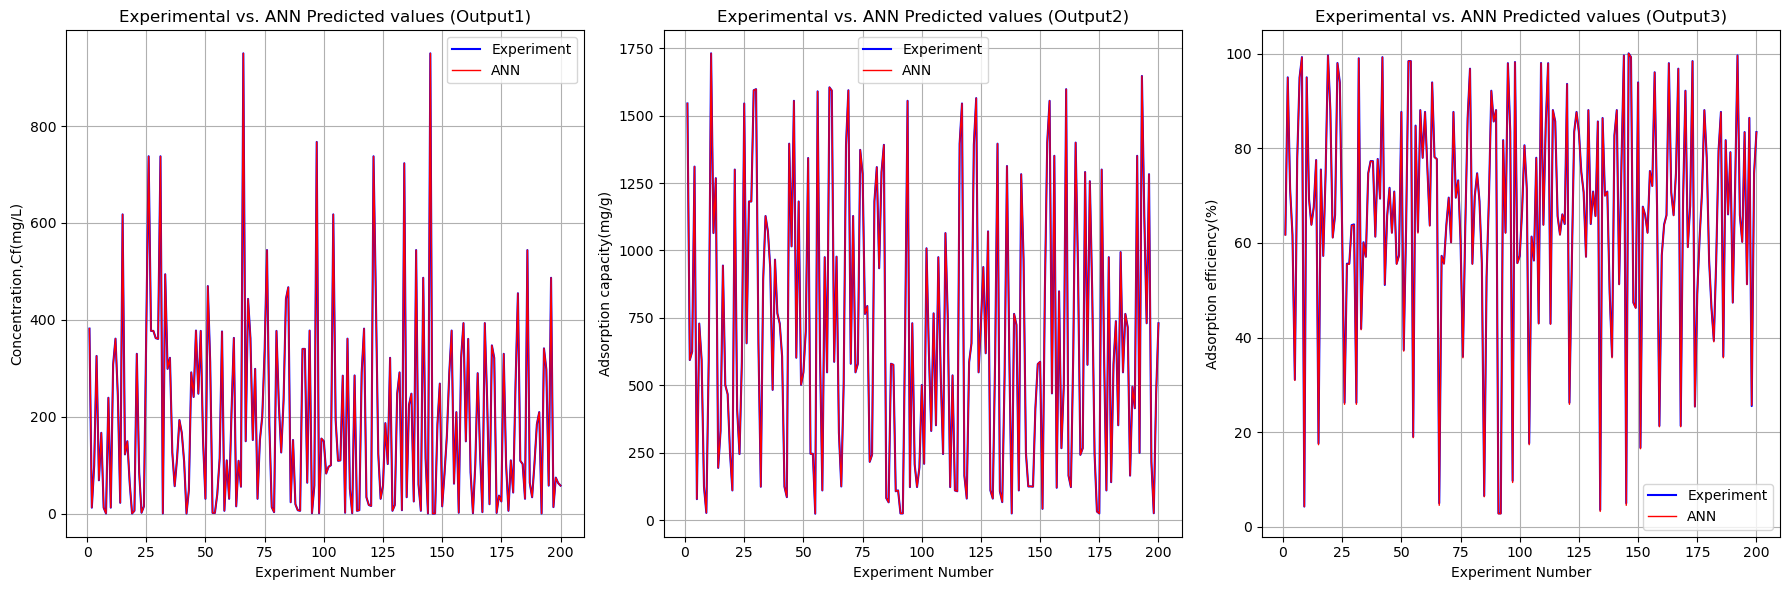

In [36]:
df = pd.read_excel('predicted_data_with_inputs.xlsx')
# experiment numbers, Output1 values, and predicted Output1 values
experiment_numbers = df['Experiment'][:200]
output1_values = df['Concentration,Cf(mg/L)'][:200]
predicted_output1_values = df['predicted_Concentration,Cf(mg/L)'][:200]


fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns for 3 plots

# Plot 1: Concentration,Cf(mg/L)
axes[0].plot(experiment_numbers, output1_values, label='Experiment', linestyle='-', color='blue')
axes[0].plot(experiment_numbers, predicted_output1_values, label='ANN', linestyle='-', color='red', linewidth=1)
axes[0].set_xlabel('Experiment Number')
axes[0].set_ylabel('Concentration,Cf(mg/L)')
axes[0].set_title('Experimental vs. ANN Predicted values (Output1)')
axes[0].legend()
axes[0].grid()

# experiment numbers, Output2 values, and predicted Output2 values
experiment_numbers = df['Experiment'][:200]
output2_values = df['Adsorption capacity(mg/g)'][:200]
predicted_output2_values = df['predicted_Adsorption capacity(mg/g)'][:200]

# Plot 2: Adsorption capacity(mg/g)
axes[1].plot(experiment_numbers, output2_values, label='Experiment', linestyle='-', color='blue')
axes[1].plot(experiment_numbers, predicted_output2_values, label='ANN', linestyle='-', color='red', linewidth=1)
axes[1].set_xlabel('Experiment Number')
axes[1].set_ylabel('Adsorption capacity(mg/g)')
axes[1].set_title('Experimental vs. ANN Predicted values (Output2)')
axes[1].legend()
axes[1].grid()

# experiment numbers, Output3 values, and predicted Output3 values
experiment_numbers = df['Experiment'][:200]
output3_values = df['Adsorption efficiency(%)'][:200]
predicted_output3_values = df['predicted_Adsorption efficiency(%)'][:200]

# Plot 3: Adsorption efficiency(%)
axes[2].plot(experiment_numbers, output3_values, label='Experiment', linestyle='-', color='blue')
axes[2].plot(experiment_numbers, predicted_output3_values, label='ANN', linestyle='-', color='red', linewidth=1)
axes[2].set_xlabel('Experiment Number')
axes[2].set_ylabel('Adsorption efficiency(%)')
axes[2].set_title('Experimental vs. ANN Predicted values (Output3)')
axes[2].legend()
axes[2].grid()


plt.tight_layout()
plt.show()

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_excel("Data.xlsx", skiprows=1)
X = data.drop(columns=['Stirringspeed', 'Temp', 'Time', 'Dosage', 'pH', 'Concentration'], axis =1)
y = data[['Concentration,Cf(mg/L)', 'Adsorption capacity(mg/g)', 'Adsorption efficiency(%)']]
X.columns = X.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
model = RandomForestRegressor(n_estimators=200, max_features=6,bootstrap=True, max_depth=None, oob_score=True, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2:", r2_score(y_test, y_pred, sample_weight=None, force_finite=True))

Mean Squared Error: 2.9682912985873407e-24
R2: 1.0


RF model prediction


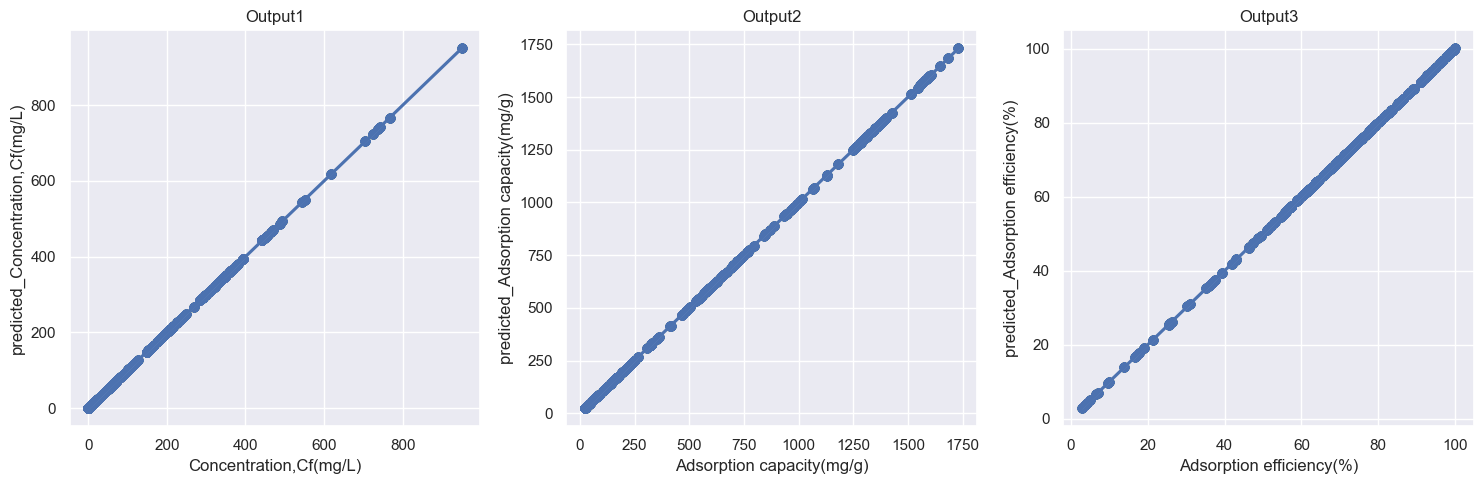

In [41]:
sns.set_theme(style='darkgrid')
df = pd.read_excel('predicted_data_with_inputs_RF.xlsx')
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns for 3 plots

# Regression plot for Output1, output 2, and output 3
sns.regplot(x='Concentration,Cf(mg/L)', y='predicted_Concentration,Cf(mg/L)', data=df, ax=axes[0])
axes[0].set_title('Output1')
sns.regplot(x='Adsorption capacity(mg/g)', y='predicted_Adsorption capacity(mg/g)', data=df, ax=axes[1])
axes[1].set_title('Output2')

sns.regplot(x='Adsorption efficiency(%)', y='predicted_Adsorption efficiency(%)', data=df, ax=axes[2])
axes[2].set_title('Output3')

print('RF model prediction')
plt.tight_layout()
plt.show()

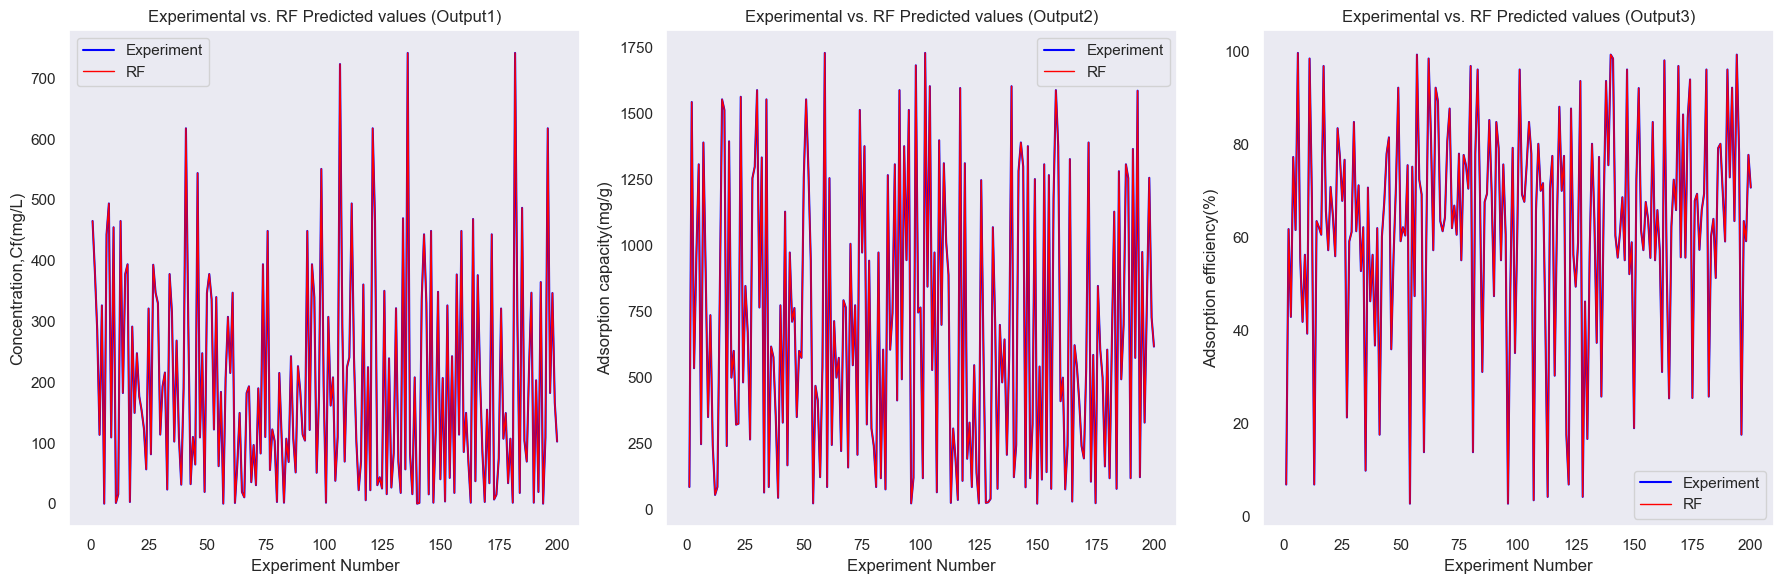

In [44]:
df = pd.read_excel('predicted_data_with_inputs_RF.xlsx')
# experiment numbers, Output1 values, and predicted Output1 values
experiment_numbers = df['Experiment'][:200]
output1_values = df['Concentration,Cf(mg/L)'][:200]
predicted_output1_values = df['predicted_Concentration,Cf(mg/L)'][:200]


fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns for 3 plots

# Plot 1: Concentration,Cf(mg/L)
axes[0].plot(experiment_numbers, output1_values, label='Experiment', linestyle='-', color='blue')
axes[0].plot(experiment_numbers, predicted_output1_values, label='RF', linestyle='-', color='red', linewidth=1)
axes[0].set_xlabel('Experiment Number')
axes[0].set_ylabel('Concentration,Cf(mg/L)')
axes[0].set_title('Experimental vs. RF Predicted values (Output1)')
axes[0].legend()
axes[0].grid()

# experiment numbers, Output2 values, and predicted Output2 values
experiment_numbers = df['Experiment'][:200]
output2_values = df['Adsorption capacity(mg/g)'][:200]
predicted_output2_values = df['predicted_Adsorption capacity(mg/g)'][:200]

# Plot 2: Adsorption capacity(mg/g)
axes[1].plot(experiment_numbers, output2_values, label='Experiment', linestyle='-', color='blue')
axes[1].plot(experiment_numbers, predicted_output2_values, label='RF', linestyle='-', color='red', linewidth=1)
axes[1].set_xlabel('Experiment Number')
axes[1].set_ylabel('Adsorption capacity(mg/g)')
axes[1].set_title('Experimental vs. RF Predicted values (Output2)')
axes[1].legend()
axes[1].grid()

# experiment numbers, Output3 values, and predicted Output3 values
experiment_numbers = df['Experiment'][:200]
output3_values = df['Adsorption efficiency(%)'][:200]
predicted_output3_values = df['predicted_Adsorption efficiency(%)'][:200]

# Plot 3: Adsorption efficiency(%)
axes[2].plot(experiment_numbers, output3_values, label='Experiment', linestyle='-', color='blue')
axes[2].plot(experiment_numbers, predicted_output3_values, label='RF', linestyle='-', color='red', linewidth=1)
axes[2].set_xlabel('Experiment Number')
axes[2].set_ylabel('Adsorption efficiency(%)')
axes[2].set_title('Experimental vs. RF Predicted values (Output3)')
axes[2].legend()
axes[2].grid()


plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
data = pd.read_excel("Data.xlsx", skiprows=1)
X = data.drop(columns=['Stirringspeed', 'Temp', 'Time', 'Dosage', 'pH', 'Concentration'], axis =1)
y = data[['Concentration,Cf(mg/L)', 'Adsorption capacity(mg/g)', 'Adsorption efficiency(%)']]
X.columns = X.columns.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
svr = SVR(kernel='rbf', C=1.0, gamma='scale', epsilon=0.1)
model = MultiOutputRegressor(svr)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error for Output 1:", mse[0])
print("Mean Squared Error for Output 2:", mse[1])
print("Mean Squared Error for Output 3:", mse[2])
r2 = r2_score(y_test, y_pred)
print("R2 Score for Output 1:", r2[0])
print("R2 Score for Output 2:", r2[1])
print("R2 Score for Output 3:", r2[2])